In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import random
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime, timedelta
%matplotlib inline

In [2]:
#Loading COVID 19 latest dataset (Till Dec 5th 2020)
data_confirmed = pd.read_csv("time_series_covid19_confirmed_global.csv")
data_deaths = pd.read_csv("time_series_covid19_deaths_global.csv")
data_recovered = pd.read_csv("time_series_covid19_recovered_global.csv")

In [3]:
data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,45600,45723,45844,46116,46274,46516,46718,46837,46837,47072
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,35600,36245,36790,37625,38182,39014,39719,40501,41302,42148
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,79110,80168,81212,82221,83199,84152,85084,85927,86730,87502
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6534,6610,6610,6712,6745,6790,6842,6904,6955,7005
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,14920,15008,15087,15103,15139,15251,15319,15361,15493,15536


In [4]:
data_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1737,1740,1752,1774,1795,1822,1841,1846,1846,1864
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,753,771,787,798,810,822,839,852,870,889
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2352,2372,2393,2410,2431,2447,2464,2480,2492,2501
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,76,76,76,76,76,76,76,77,77,78
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,341,342,345,346,348,350,351,352,353,354


In [5]:
data_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,36232,36295,36709,36716,36831,36946,37218,37260,37260,37393
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,17352,17755,18152,18481,18849,19384,19912,20484,20974,21286
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,51334,51946,52568,53204,53809,54405,54990,55538,56079,56617
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,5649,5710,5710,5794,5873,5940,5988,6066,6130,6171
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,7617,7697,7763,7763,7851,7932,8139,8244,8299,8335


In [6]:
columns = data_confirmed.keys()
columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '11/26/20', '11/27/20', '11/28/20', '11/29/20', '11/30/20', '12/1/20',
       '12/2/20', '12/3/20', '12/4/20', '12/5/20'],
      dtype='object', length=323)

Storing the values of dates only

In [7]:
dates_confirmed = data_confirmed.loc[:, columns[4]:columns[-1]]
dates_confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20
0,0,0,0,0,0,0,0,0,0,0,...,45600,45723,45844,46116,46274,46516,46718,46837,46837,47072
1,0,0,0,0,0,0,0,0,0,0,...,35600,36245,36790,37625,38182,39014,39719,40501,41302,42148
2,0,0,0,0,0,0,0,0,0,0,...,79110,80168,81212,82221,83199,84152,85084,85927,86730,87502
3,0,0,0,0,0,0,0,0,0,0,...,6534,6610,6610,6712,6745,6790,6842,6904,6955,7005
4,0,0,0,0,0,0,0,0,0,0,...,14920,15008,15087,15103,15139,15251,15319,15361,15493,15536


In [8]:
dates_deaths = data_deaths.loc[:, columns[4]:columns[-1]]
dates_deaths.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20
0,0,0,0,0,0,0,0,0,0,0,...,1737,1740,1752,1774,1795,1822,1841,1846,1846,1864
1,0,0,0,0,0,0,0,0,0,0,...,753,771,787,798,810,822,839,852,870,889
2,0,0,0,0,0,0,0,0,0,0,...,2352,2372,2393,2410,2431,2447,2464,2480,2492,2501
3,0,0,0,0,0,0,0,0,0,0,...,76,76,76,76,76,76,76,77,77,78
4,0,0,0,0,0,0,0,0,0,0,...,341,342,345,346,348,350,351,352,353,354


In [9]:
dates_recovered = data_recovered.loc[:, columns[4]:columns[-1]]
dates_recovered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20
0,0,0,0,0,0,0,0,0,0,0,...,36232,36295,36709,36716,36831,36946,37218,37260,37260,37393
1,0,0,0,0,0,0,0,0,0,0,...,17352,17755,18152,18481,18849,19384,19912,20484,20974,21286
2,0,0,0,0,0,0,0,0,0,0,...,51334,51946,52568,53204,53809,54405,54990,55538,56079,56617
3,0,0,0,0,0,0,0,0,0,0,...,5649,5710,5710,5794,5873,5940,5988,6066,6130,6171
4,0,0,0,0,0,0,0,0,0,0,...,7617,7697,7763,7763,7851,7932,8139,8244,8299,8335


In [13]:
# USA - confirmed and deaths 
us_confirmed_df = data_confirmed.loc[data_confirmed['Country/Region'] == 'US', columns[4]:columns[-1]]
us_deaths_df = data_deaths.loc[data_confirmed['Country/Region'] == 'US', columns[4]:columns[-1]]

In [14]:
# Calculating the total sum of the deaths, cases and recovered rate for the world
dates = dates_confirmed.keys()
total_cases_worldwide = []
total_deaths_worldwide = []
total_recovered_worldwide = []
mortality_rate = []
us_confirmed = []
us_deaths = []

for i in range(len(dates)):
    sum_confirmed = dates_confirmed[dates[i]].sum()
    sum_death = dates_deaths[dates[i]].sum()
    sum_recovered = dates_recovered[dates[i]].sum()
    total_cases_worldwide.append(sum_confirmed)
    total_deaths_worldwide.append(sum_death)
    mortality_rate.append(sum_death / sum_confirmed)
    total_recovered_worldwide.append(sum_recovered)
    us_confirmed.append(us_confirmed_df[dates[i]].sum())
    us_deaths.append(us_deaths_df[dates[i]].sum())

In [15]:
# reshaping data
days_data = []
cases_data = []
days = np.array([i for i in range(len(dates))])
for i in range(0, 4):
    cases_data.append([])
    days_data.append([])
    for c in total_cases_worldwide[i:len(total_cases_worldwide)]:
        cases_data[i].append(c)
    for d in days[i:len(days)]:
        days_data[i].append(d)
        
#Reshaping data
for i in range(1, 4):
    for j in range(0, i):
        days_data[i].append(0)
        cases_data[i].append(0)
cases_data = np.array(cases_data).reshape(-1, 1)
days_data = np.array(days_data).reshape(-1, 1)

total_cases_worldwide = np.array(total_cases_worldwide).reshape(-1, 1)
total_deaths_worldwide = np.array(total_deaths_worldwide).reshape(-1, 1)
total_recovered_worldwide = np.array(total_recovered_worldwide).reshape(-1, 1)

us_confirmed = np.array(us_confirmed).reshape(-1, 1)
us_deaths = np.array(us_deaths).reshape(-1, 1)

EDA

In [16]:
days_in_future = 3
future_forcast = np.array([i for i in range(len(dates) + days_in_future)]).reshape(-1, 1)
start_date = datetime.strptime(dates[0], '%m/%d/%y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + timedelta(days=i)).strftime('%m/%d/%Y'))
adjusted_dates = future_forcast_dates[:-3]


In [17]:
#Splitting into training and test sets
X_train_confirmed,X_test_confirmed, y_train_confirmed,y_test_confirmed = train_test_split(days_data,cases_data,test_size=0.3,shuffle=False)

SVM

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    7.1s finished


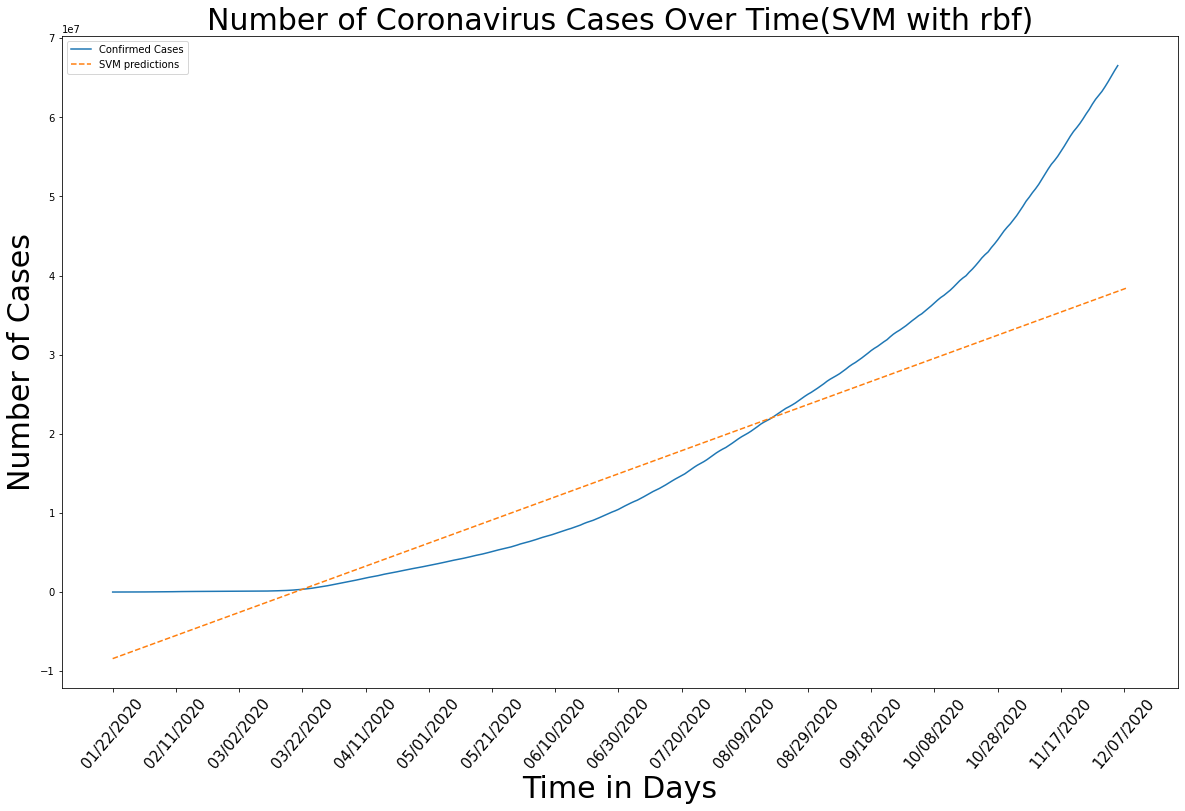

In [26]:
kernel = ['linear', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma': gamma, 'epsilon': epsilon, 'shrinking': shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True,
                                n_jobs=-1, n_iter=30, verbose=1)

svm_search.fit(X_train_confirmed, y_train_confirmed.ravel())

svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forcast)
test_rfr_pred_svm = svm_confirmed.predict(X_test_confirmed)
test_rfr_pred_svm

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_cases_worldwide)
plt.plot(future_forcast_dates, svm_pred, linestyle='dashed')
plt.title('Number of Coronavirus Cases Over Time(SVM with rbf)', size=30)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'])
plt.xticks(np.arange(0, len(future_forcast_dates), 20), rotation=50, size=15)
plt.show()

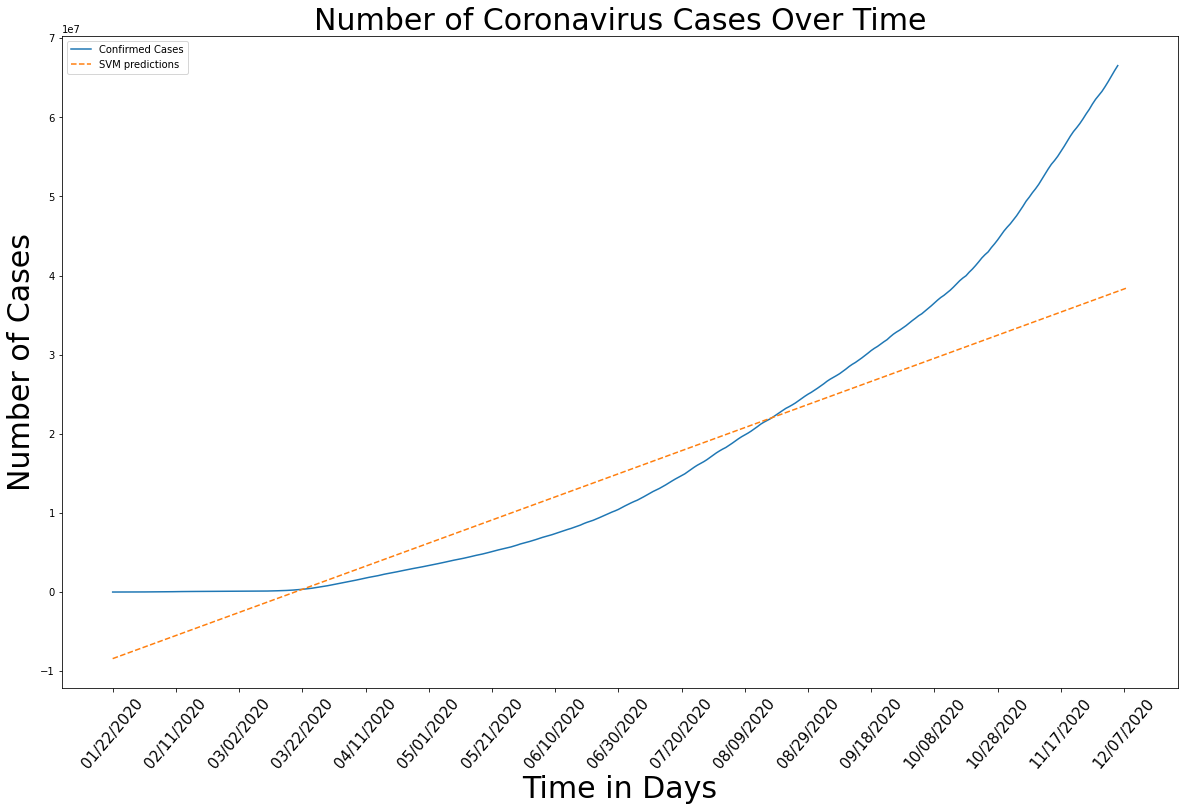

In [24]:
# plot
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_cases_worldwide)
plt.plot(future_forcast_dates, svm_pred, linestyle='dashed')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'])
plt.xticks(np.arange(0, len(future_forcast_dates), 20), rotation=50, size=15)
plt.show()

In [27]:
print('MAE SVM:', mean_absolute_error(test_rfr_pred_svm, y_test_confirmed))
print('MSE SVM:', mean_squared_error(test_rfr_pred_svm, y_test_confirmed))

MAE SVM: 7318832.446866842
MSE SVM: 105436501907439.83
